<a href="https://colab.research.google.com/github/Intertangler/ML4biotech/blob/main/cb206v_exercise3_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## excerise - fitting
### background story
We're analyzing a population of cells that we know to be a mixture of 3 distinct types. We've done some single cell sequencing analysis on the cells and want to be able to study the expression patterns of each individual cell. Fortunately, we know a particular gene whose expression level strongly predicts which cell type we're dealing with - low expression level of the gene is type 1 cell, medium expression is type 2, and high expression is type 3. The goal of this exercise is to classify each cell type according to expresison level by fitting a Gaussian mixture model (GMM) to the data from this gene.

### part 1 - fitting the Gaussian mixture model to the data with MLE
In this part, we are going to take a model (a mixture of multiple Gaussian PDFs) and adjust the parameters until the model best fits the data. The discovered parameters will tell us the average expression levels and relative spread of each of the cell subpopulations we are interested in.

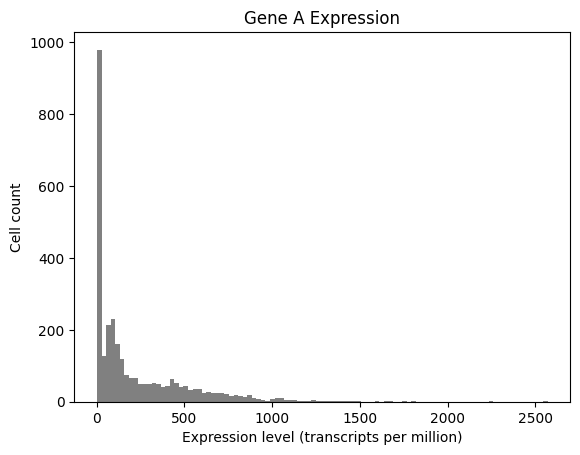

In [4]:
"""
First, let's import the data and transform it into something that we can fit a GMM to.
As we often do, let's make a histogram to visualize the data.
"""

import matplotlib.pyplot as plt
import numpy as np

# Load data, labels, and true_params from URLs
url = "https://raw.githubusercontent.com/Intertangler/ML4biotech/main/gaussian_data_raw.csv"
data = np.loadtxt(url,dtype="float")

# MAke a histogram to visualize the data in its raw form - lognormally distributed genes
bins = np.linspace(np.min(data), np.max(data), 100)
plt.hist(data, bins=bins, color='grey', label='Unified Dataset')
plt.xlabel('Expression level (transcripts per million)')
plt.ylabel('Cell count')
plt.title('Gene A Expression')
plt.show()

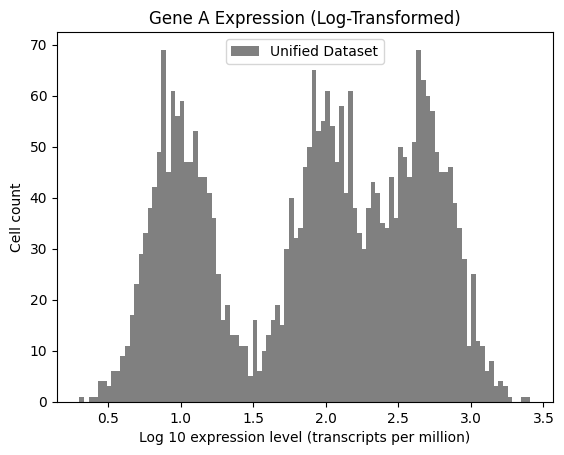

In [5]:
"""
In this experiment, the cell expression data (in transcripts per million) are lognormally
distributed - and consequently these expression levels tend to be more spread out,
the higher their values are. So, we will take the log of the data. If the data is
indeed lognormally distributed, then this will have the effect of turning the data
into normally (i.e. Gaussian) distributed data, that we will then be able to process with
our GMM.
"""

#🌟🌟🌟🌟 YOUR CODE HERE 🌟🌟🌟🌟# Log-transform the data to make it more normally distributed

bins = np.linspace(np.min(log_data), np.max(log_data), 100)


plt.hist(log_data, bins=bins, color='grey', label='Unified Dataset')
plt.xlabel('Log 10 expression level (transcripts per million)')
plt.ylabel('Cell count')
plt.title('Gene A Expression (Log-Transformed)')
plt.legend()
plt.show()

In [6]:
"""
Next we want to fit a GMM to this now-Gaussian data. We will use the method of
Maximum Likelihood Estimation. The requires us to have 1. a probability density
function that enables us to compute probability densities for a given set of parameters.
And 2. we need a loss function that the minimizer can use to find the right parameters.
For this loss function, we will use the Negative Log Likelihood function NLL.
"""
from scipy.optimize import minimize
def mixture_model_pdf(data_point, *params):
    n_gaussians = len(params) // 3
    pi, mus, sigmas = params[:n_gaussians], params[n_gaussians:2*n_gaussians], params[2*n_gaussians:]
#🌟🌟🌟🌟 YOUR CODE HERE 🌟🌟🌟🌟# loop through each of the gaussians
#🌟🌟🌟🌟 YOUR CODE HERE 🌟🌟🌟🌟#
#🌟🌟🌟🌟 YOUR CODE HERE 🌟🌟🌟🌟# compute the probability density associated with the particular gaussian mixture, for a given data point and parameters
#🌟🌟🌟🌟 YOUR CODE HERE 🌟🌟🌟🌟#

def nll(params, data):

    log_likelihood = 0
    for data_point in data:
#🌟🌟🌟🌟 YOUR CODE HERE 🌟🌟🌟🌟# fetch the probability density using the mixture model pdf function
#🌟🌟🌟🌟 YOUR CODE HERE 🌟🌟🌟🌟#
#🌟🌟🌟🌟 YOUR CODE HERE 🌟🌟🌟🌟# convert the probability density into a log and add it to the overall log likelihood

    return -log_likelihood


initial_guess = [0.33, 0.33, 0.34, 1, 2, 5, 1, 1, 1]
bounds = [(0, 1), (0, 1), (0, 1),  # bounds for pi
          (None, None), (None, None), (None, None),  # bounds for mu - we allow any real number
          (1e-6, None), (1e-6, None), (1e-6, None)]  # bounds for sigma, should be positive

# Constraints to ensure the sum of the weights is 1
constraints = {'type': 'eq', 'fun': lambda x: np.sum(x[:3]) - 1}

res = minimize(nll, initial_guess, args=(log_data), bounds=bounds, constraints=constraints)


res

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_slsqp_py.py:437: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)


 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 2613.289055810625
       x: [ 3.291e-01  3.299e-01  3.409e-01  2.686e+00  9.907e-01
            2.004e+00  2.145e-01  2.120e-01  2.284e-01]
     nit: 75
     jac: [-3.000e+03 -3.000e+03 -3.000e+03 -5.646e-03  8.850e-03
           -2.747e-04 -3.998e-03  1.846e-02  1.526e-03]
    nfev: 813
    njev: 75

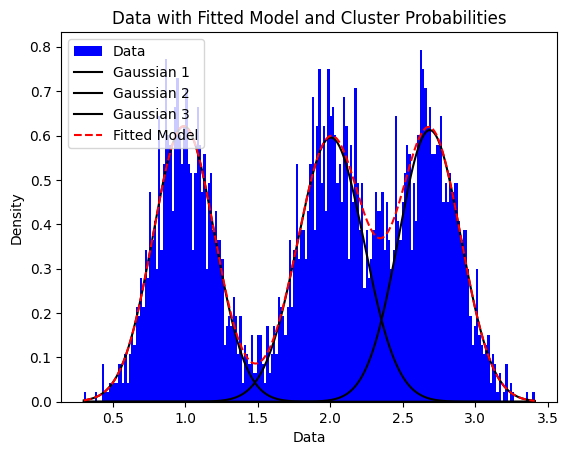

In [7]:
import numpy as np
import matplotlib.pyplot as plt

"""
If your minimization setup worked correctly, then when you run this cell, you will
see Gaussian peaks fitted nicely to the data, with the sum of those peaks shown
as well as their individual contributions.
"""
def visualize_data_and_model(data, params):
    plt.figure()
    plt.hist(data, bins=200, density=True, color='b', label='Data')

    plt.xlabel('Data')
    plt.ylabel('Density')
    plt.title('Data with Fitted Model Overlaid')
    plt.legend(loc='upper left')

    # Generate the Gaussian curves for visualization
    n_gaussians = len(params) // 3
    pi, mus, sigmas = params[:n_gaussians], params[n_gaussians:2*n_gaussians], params[2*n_gaussians:]

    x = np.linspace(min(data), max(data), 1000)
    y = [pi[i] * (1/(sigmas[i] * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x - mus[i]) / sigmas[i]) ** 2)) for i in range(n_gaussians)]

    for i in range(n_gaussians):
        plt.plot(x, y[i], label=f'Gaussian {i+1}',c="k")
    x = np.linspace(min(data), max(data), 1000)
    y = mixture_model_pdf(x, *params)
    plt.plot(x, y, label='Fitted Model',c="r",linestyle="--")
    # Set plot labels and title
    plt.xlabel('Data')
    plt.ylabel('Density')
    plt.title('Data with Fitted Model and Cluster Probabilities')
    plt.legend(loc='upper left')


visualize_data_and_model(log_data, res.x)


## part i - extra - a trickier distribution
In this version of the code above, we've added a trickier distribution which does not always lead to correct fits. Try to diagnose the setup and fix the result, such that 3 distinct Gaussians are fit to the data.

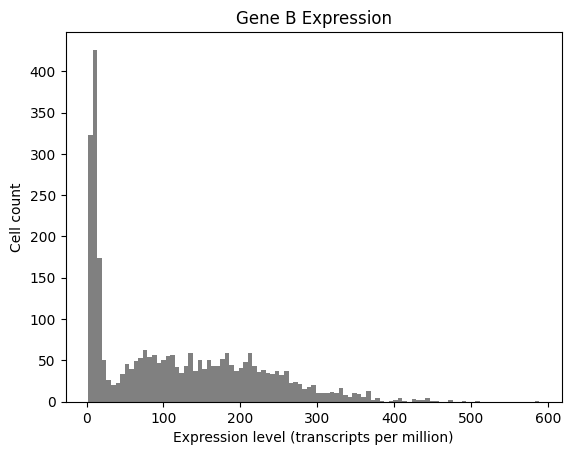

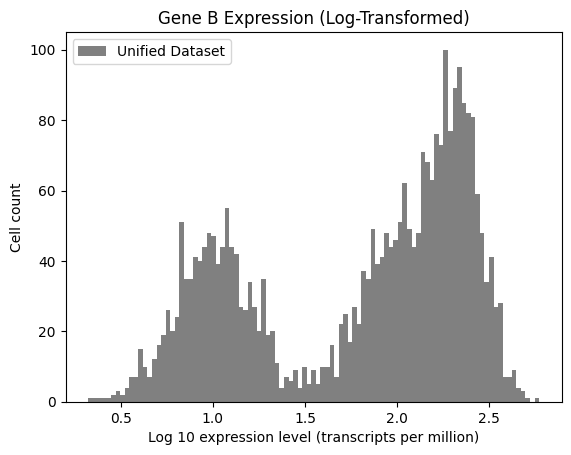

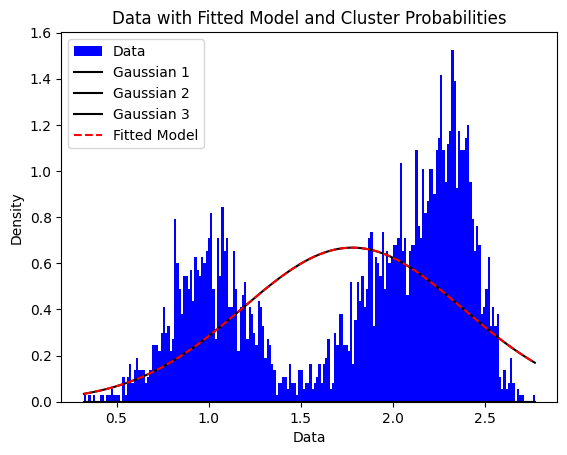

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

url2 = "https://raw.githubusercontent.com/Intertangler/ML4biotech/main/gaussian_data2raw.csv"
data2 = np.loadtxt(url2,dtype="float")


bins2 = np.linspace(np.min(data2), np.max(data2), 100)
plt.hist(data2, bins=bins2, color='grey', label='Unified Dataset')
plt.xlabel('Expression level (transcripts per million)')
plt.ylabel('Cell count')
plt.title('Gene B Expression')
plt.show()


log_data2 = np.log10(data2)
bins22 = np.linspace(np.min(log_data2), np.max(log_data2), 100)
plt.hist(log_data2, bins=bins22, color='grey', label='Unified Dataset')
plt.xlabel('Log 10 expression level (transcripts per million)')
plt.ylabel('Cell count')
plt.title('Gene B Expression (Log-Transformed)')
plt.legend()
plt.show()
initial_guess2 = [0.33, 0.33, 0.34, 10, 10, 10, 10, 10, 10] #🌟🌟🌟🌟 make adjustments here 🌟🌟🌟🌟#
bounds2 = [(0, 1), (0, 1), (0, 1),  # bounds for pi
          (None, None), (None, None), (None, None),
          (1e-6, None), (1e-6, None), (1e-6, None)]
constraints2 = {'type': 'eq', 'fun': lambda x: np.sum(x[:3]) - 1}
res2 = minimize(nll, initial_guess2, args=(log_data2), bounds=bounds2, constraints=constraints2)
visualize_data_and_model(log_data2, res2.x)


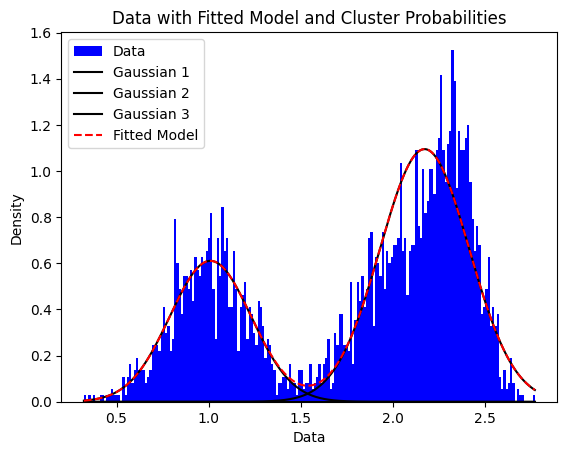

In [ ]:
"""
Another strategy, if unsuccessful with one optimization method, is to simply try another.
The Basin-hopping or simulated annealing method can often handle more difficult
parameter spaces in which there are local minima. Try running it and see if the
result is different.
"""
from scipy.optimize import basinhopping
def constraints(params):
    return np.sum(params[:3]) - 1

# Define a function to check if the parameters are within bounds
def within_bounds(f_new, x_new, f_old, x_old):
    bounds = [
        (0, 1), (0, 1), (0, 1),  # bounds for pi
        (None, None), (None, None), (None, None),  # bounds for mu, allowing any real number
        (1e-6, None), (1e-6, None), (1e-6, None)   # bounds for sigma, should be positive
    ]
    return all(
        (bounds[i][0] is None or x_new[i] >= bounds[i][0]) and
        (bounds[i][1] is None or x_new[i] <= bounds[i][1])
        for i in range(len(x_new))
    )

# Set up the basin hopping method
minimizer = {"method": "L-BFGS-B"}
constraints2 = {"type": "eq", "fun": constraints}
res2bh = basinhopping(nll, initial_guess2, minimizer_kwargs={"args": (log_data2,), "bounds": bounds2, "constraints": constraints2}, stepsize=1, niter=10, accept_test=within_bounds)
visualize_data_and_model(log_data2, res2bh.x)

## part ii - classifying cells via their expression levels


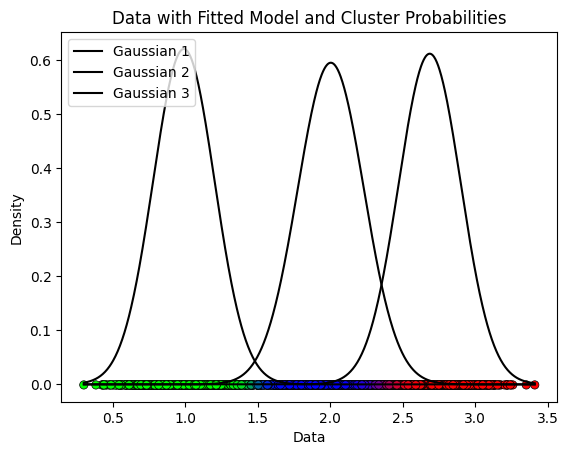

In [ ]:
"""
Next, let's assign identities to each of the cells (data points) according to
which Gaussian they are most probably belonging to. Since we have a probabilistic
gaussian mixture model, this should let us compute the probability that any particular
point on the axis of our random variable (gene expression level), or in other words
each data point...is produced by one or other of the gaussians. For each point then
we can compute 3 probabilities for each gaussian. The most likely gaussian becomes
our decision then - and we assign that point to the respective gaussian. Some cells
will be called with greater confidence than others - this is an advantage to this
method over harder clustering methods like k-means.
"""

def assign_clusters(data, params):
    n_gaussians = len(params) // 3
    pi, mus, sigmas = params[:n_gaussians], params[n_gaussians:2*n_gaussians], params[2*n_gaussians:]
    probabilities = np.zeros((n_gaussians, len(data)))

    for i in range(n_gaussians):
 #🌟🌟🌟🌟 YOUR CODE HERE 🌟🌟🌟🌟# loop through each data point
 #🌟🌟🌟🌟 YOUR CODE HERE 🌟🌟🌟🌟# compute the probability of each data point for each respective gaussian

    probabilities /= np.sum(probabilities, axis=0)

    return probabilities

predicted_probabilities = assign_clusters(log_data, res.x)
predicted_labels = np.argmax(predicted_probabilities, axis=0)


import matplotlib.pyplot as plt
def visualize_clusters_and_model(data, params, probabilities):
    n_gaussians = len(params) // 3
    pi, mus, sigmas = params[:n_gaussians], params[n_gaussians:2*n_gaussians], params[2*n_gaussians:]
    x = np.linspace(min(data), max(data), 1000)
    y = [pi[i] * (1/(sigmas[i] * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x - mus[i]) / sigmas[i]) ** 2)) for i in range(n_gaussians)]
    plt.figure()
    for i in range(n_gaussians):
        plt.plot(x, y[i], label=f'Gaussian {i+1}',c="k")
    colors = probabilities.T
    plt.scatter(data, np.zeros_like(data) - 0.001, c=colors, marker='o',edgecolors='k', linewidths=0.5)
    plt.xlabel('Data')
    plt.ylabel('Density')
    plt.title('Data with Fitted Model and Cluster Probabilities')
    plt.legend(loc='upper left')
    plt.show()

visualize_clusters_and_model(log_data, res.x, predicted_probabilities)


## Extra - multiple dimensions and GMM via packages

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from matplotlib.colors import LogNorm


n_gaussians = 3
means = [np.array([1, 1]), np.array([5, 5]), np.array([9, 1])]
covariances = [np.array([[1, 0.5], [0.5, 1]]), np.array([[1, -0.5], [-0.5, 1]]), np.array([[1, 0.8], [0.8, 1]])]
weights = [0.3, 0.5, 0.2]

data = np.vstack([np.random.multivariate_normal(means[i], covariances[i], int(1000*weights[i])) for i in range(n_gaussians)])

gmm = GaussianMixture(n_components=n_gaussians, covariance_type='full')
gmm.fit(data)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from matplotlib.patches import Ellipse
from matplotlib.colors import LogNorm

x = np.linspace(data[:, 0].min(), data[:, 0].max(), 100)
y = np.linspace(data[:, 1].min(), data[:, 1].max(), 100)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = gmm.score_samples(XX)
Z = Z.reshape((100, 100))

plt.figure()
plt.scatter(data[:, 0], data[:, 1], c='blue', s=5, label='Data')
plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0), levels=np.linspace(Z.min(), Z.max(), 10), cmap='viridis')


def draw_ellipse(position, covariance, ax=None, **kwargs):
    ax = ax or plt.gca()
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height, angle, **kwargs))

for i, (mean, covar) in enumerate(zip(gmm.means_, gmm.covariances_)):
    draw_ellipse(mean, covar, alpha=0.2, color='red')

plt.title('2D GMM fit on top of original data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

